In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import datetime
from datetime import datetime, timezone
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip

unzip:  cannot find or open /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip, /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip.zip or /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip.ZIP.


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AnomalyDetection_Dataset/energy_anamoly.csv')

In [ ]:
df.head()

,building_id,timestamp,meter_reading,anomaly
0,1,01-01-2016 00:00,NaN,0
1,32,01-01-2016 00:00,NaN,0
2,41,01-01-2016 00:00,NaN,0
3,55,01-01-2016 00:00,NaN,0
4,69,01-01-2016 00:00,NaN,0


In [ ]:
df.tail()

,building_id,timestamp,meter_reading,anomaly
1048570,657,07-08-2016 09:00,15.3,0
1048571,658,07-08-2016 09:00,11.2,0
1048572,666,07-08-2016 09:00,2.9,0
1048573,667,07-08-2016 09:00,1.7,0
1048574,673,07-08-2016 09:00,5.1,0


In [ ]:
df.shape

(1048575, 4)

In [ ]:
df.columns

Index(['building_id', 'timestamp', 'meter_reading', 'anomaly'], dtype='object')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

building_id          0
timestamp            0
meter_reading    77102
anomaly              0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   building_id    1048575 non-null  int64  
 1   timestamp      1048575 non-null  object 
 2   meter_reading  971473 non-null   float64
 3   anomaly        1048575 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 32.0+ MB


In [ ]:
df.describe()

,building_id,meter_reading,anomaly
count,1.048575e+06,971473.000000,1.048575e+06
mean,7.908887e+02,180.777984,2.254393e-02
std,4.118324e+02,404.195181,1.484443e-01
min,1.000000e+00,0.000000,0.000000e+00
25%,3.450000e+02,30.406000,0.000000e+00
50%,8.960000e+02,85.700000,0.000000e+00
75%,1.147000e+03,198.685000,0.000000e+00
max,1.353000e+03,6596.890000,1.000000e+00


In [ ]:
df.nunique()

building_id         200
timestamp          5266
meter_reading    137894
anomaly               2
dtype: int64

In [ ]:
df['anomaly'].unique()

array([0, 1])

In [ ]:
df['anomaly'].value_counts()

0    1024936
1      23639
Name: anomaly, dtype: int64

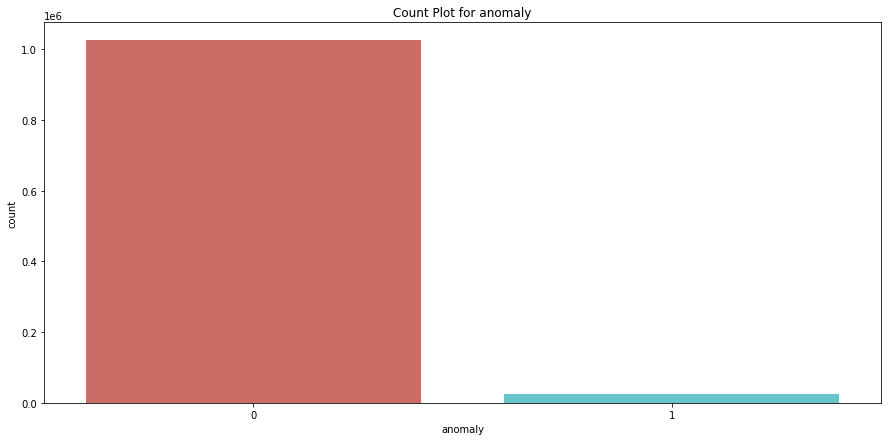

In [ ]:
plt.figure(figsize=[15,7],)
plt.title('Count Plot for anomaly')
sns.countplot(x = 'anomaly', data = df, palette = 'hls')
plt.show()

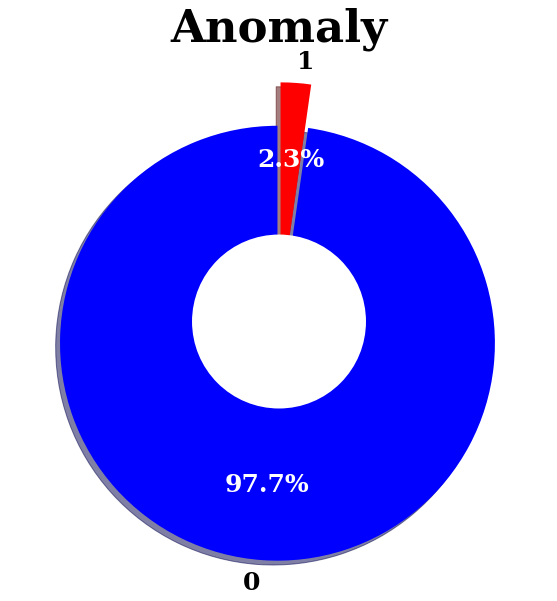

In [ ]:
anomaly = df['anomaly'].value_counts()

explode = (0.1, 0.1)
plt.figure(figsize=(14, 10))
patches, texts, pcts = plt.pie(anomaly,
                               labels = anomaly.index,
                               colors = ['blue', 'red'],
                               pctdistance = 0.65,
                               shadow = True,
                               startangle = 90,
                               explode = explode,
                               autopct = '%1.1f%%',
                               textprops={ 'fontsize': 25,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
plt.setp(pcts, color='white')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Anomaly', size=45, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [ ]:
df['building_id'].unique()

array([   1,   32,   41,   55,   69,   79,   82,   91,  107,  108,  111,
        112,  117,  118,  119,  121,  136,  137,  139,  141,  144,  147,
        148,  149,  159,  171,  173,  174,  181,  183,  190,  235,  238,
        240,  246,  247,  248,  253,  254,  263,  270,  275,  276,  278,
        290,  293,  312,  318,  335,  345,  356,  423,  439,  492,  534,
        560,  623,  653,  657,  658,  666,  667,  673,  675,  677,  680,
        683,  685,  687,  693,  697,  698,  701,  708,  710,  721,  722,
        729,  730,  732,  739,  742,  801,  827,  844,  848,  879,  880,
        881,  882,  884,  886,  887,  889,  890,  892,  893,  894,  895,
        896,  903,  905,  909,  914,  919,  922,  924,  925,  926,  928,
        929,  931,  935,  936,  941,  942,  945,  948,  950,  952,  961,
        966,  967,  968,  969,  970,  971,  973,  974,  975,  977,  978,
        981,  988,  990,  992,  994,  996, 1001, 1007, 1068, 1073, 1074,
       1106, 1120, 1128, 1137, 1141, 1143, 1147, 11

In [ ]:
df['building_id'].value_counts()

1       5266
121     5266
673     5266
658     5266
657     5266
        ... 
950     5130
909     4951
827     4775
844     4466
1353    4096
Name: building_id, Length: 200, dtype: int64

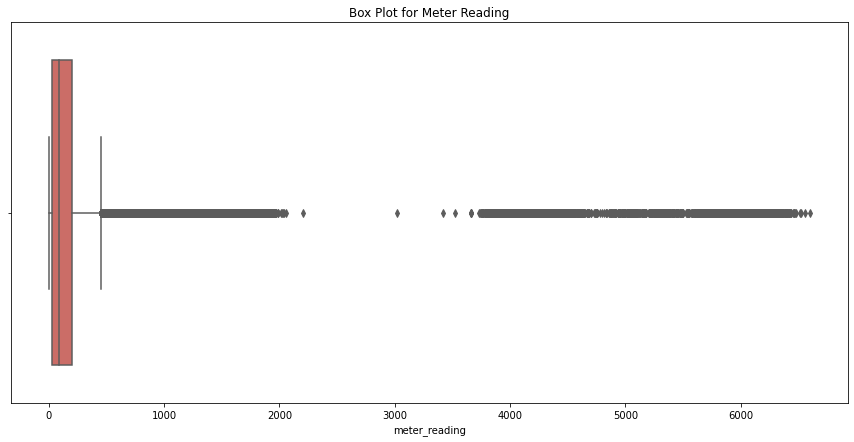

In [ ]:
plt.figure(figsize=[15,7],)
plt.title('Box Plot for Meter Reading')
sns.boxplot(x = 'meter_reading', data = df, palette = 'hls')
plt.show()

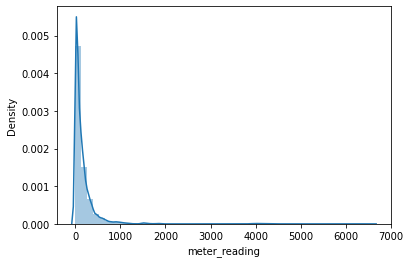

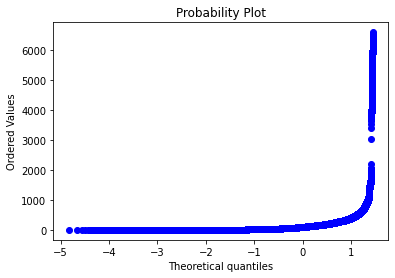

In [ ]:
fig = plt.figure()
ax = fig.gca()
sns.distplot(df['meter_reading'])
plt.show()

#Probability plot
fig = plt.figure()
res = stats.probplot(df['meter_reading'], plot=plt)

In [ ]:
df_name = df.iloc[:,[0,2]].columns

In [ ]:
# there is a problem with missing values so i will try to handel it.

from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer()
df_clean = my_imputer.fit_transform(df.iloc[:,[0,2]])

df_clean = pd.DataFrame(df_clean,columns = df_name)

missing_val_count_by_column = (df_clean.isnull().sum())
print(missing_val_count_by_column)

building_id      0
meter_reading    0
dtype: int64


In [ ]:
df = pd.concat([df.iloc[:,[1,3]], df_clean], axis=1)

In [ ]:
df

,timestamp,anomaly,building_id,meter_reading
0,01-01-2016 00:00,0,1.0,180.777984
1,01-01-2016 00:00,0,32.0,180.777984
2,01-01-2016 00:00,0,41.0,180.777984
3,01-01-2016 00:00,0,55.0,180.777984
4,01-01-2016 00:00,0,69.0,180.777984
...,...,...,...,...
1048570,07-08-2016 09:00,0,657.0,15.300000
1048571,07-08-2016 09:00,0,658.0,11.200000
1048572,07-08-2016 09:00,0,666.0,2.900000
1048573,07-08-2016 09:00,0,667.0,1.700000


In [ ]:
df = df[['timestamp',  'building_id', 'meter_reading','anomaly']]

In [ ]:
df['building_id'] = df['building_id'].apply(np.int64)

In [ ]:
df.set_index('timestamp',inplace=True)

In [ ]:
df.groupby("building_id").get_group(108)

,building_id,meter_reading,anomaly
timestamp,,,
01-01-2016 00:00,108,180.777984,0
01-01-2016 01:00,108,182.531000,1
01-01-2016 02:00,108,1.000000,1
01-01-2016 03:00,108,1.000000,1
01-01-2016 04:00,108,1.000000,1
...,...,...,...
07-08-2016 05:00,108,180.777984,0
07-08-2016 06:00,108,180.777984,0
07-08-2016 07:00,108,180.777984,0


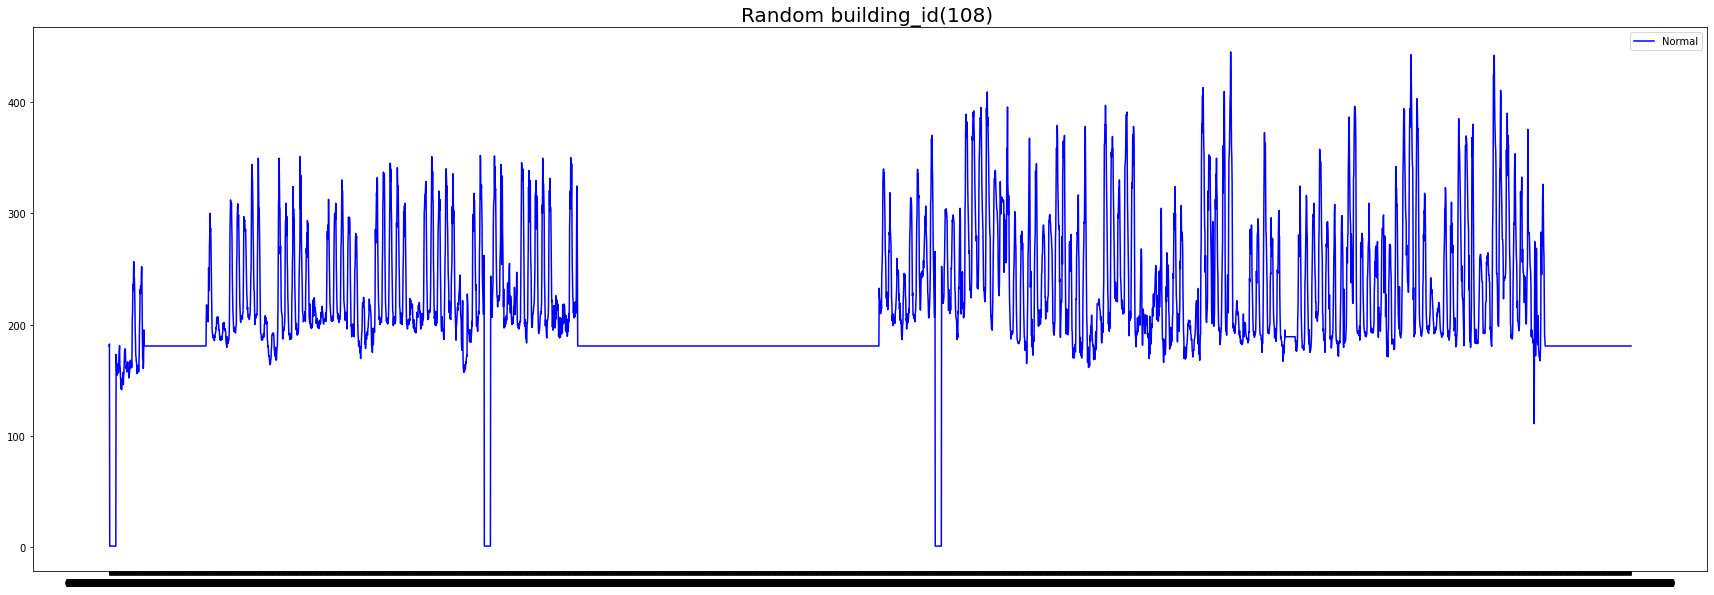

In [ ]:
fig, ax = plt.subplots(figsize=(30,10))
ax.plot(df.groupby("building_id").get_group(108)['meter_reading'].index, 
        df.groupby("building_id").get_group(108)['meter_reading'], color='blue', label = 'Normal')
ax.set_title('Random building_id(108) ', fontsize=20)
plt.legend()
plt.show();

In [ ]:
def tukeys_method(df, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_prob, outliers_poss

In [ ]:
random_building_id = df.groupby("building_id").get_group(108)

probable_outliers_tm, possible_outliers_tm = tukeys_method(random_building_id, "meter_reading")

print(probable_outliers_tm)
print("*****************************************************************************************")
print(possible_outliers_tm)

[3880, 4504, 4791, 4792]
*****************************************************************************************
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 494, 516, 588, 661, 972, 973, 975, 997, 1116, 1117, 1166, 1284, 1285, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319, 1333, 1335, 1355, 1427, 1428, 1431, 1453, 1500, 1597, 1600, 2679, 2797, 2844, 2845, 2846, 2847, 2848, 2858, 2859, 2860, 2861, 2862, 2863, 2864, 2865, 2866, 2867, 2868, 2869, 2870, 2871, 2872, 2873, 2874, 2875, 2876, 2877, 2878, 2879, 2963, 2964, 2965, 2966, 2967, 2968, 2969, 2986, 2987, 2988, 2989, 2990, 2991, 2992, 2993, 2994, 3010, 3011, 3012, 3013, 3014, 3015, 3016, 3017, 3018, 3035, 3036, 3037, 3038, 3039, 3040, 3041, 3042, 3043, 3065, 3066, 3106, 3107, 3108, 3183, 3184, 3185, 3205, 3208, 3277, 3278, 3279, 3280, 3281, 3300, 3301, 3302, 3303, 3304, 3305, 3376, 3377, 3378, 3443, 3444, 3445, 34

In [ ]:
len(probable_outliers_tm)

4

In [ ]:
len(possible_outliers_tm)

306

In [ ]:
anomaly = pd.DataFrame(possible_outliers_tm)
anomaly['Anomaly'] = 1
anomaly.set_index(0, inplace=True)

In [ ]:
random_building_id = pd.concat([random_building_id.reset_index(), anomaly], axis=1)

In [ ]:
random_building_id

,timestamp,building_id,meter_reading,anomaly,Anomaly
0,01-01-2016 00:00,108,180.777984,0,NaN
1,01-01-2016 01:00,108,182.531000,1,NaN
2,01-01-2016 02:00,108,1.000000,1,1.0
3,01-01-2016 03:00,108,1.000000,1,1.0
4,01-01-2016 04:00,108,1.000000,1,1.0
...,...,...,...,...,...
5261,07-08-2016 05:00,108,180.777984,0,NaN
5262,07-08-2016 06:00,108,180.777984,0,NaN
5263,07-08-2016 07:00,108,180.777984,0,NaN
5264,07-08-2016 08:00,108,180.777984,0,NaN


In [ ]:
random_building_id['Anomaly'] = random_building_id['Anomaly'].replace(np.nan, False)
random_building_id['Anomaly'] = random_building_id['Anomaly'].replace(1.0, True)

In [ ]:
random_building_id['Anomaly'].value_counts()

False    4960
True      306
Name: Anomaly, dtype: int64

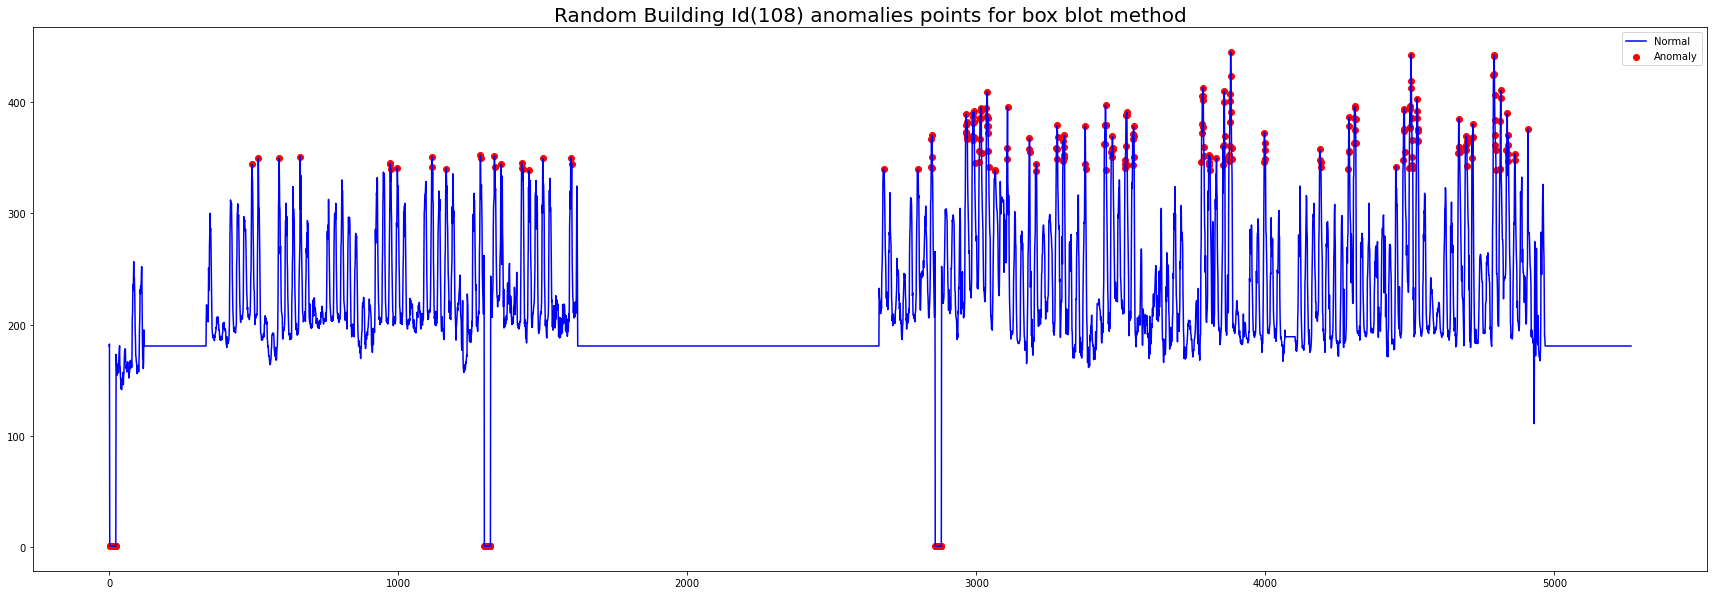

In [ ]:
fig, ax = plt.subplots(figsize=(30,10))

anomaly = random_building_id.loc[random_building_id['Anomaly'] == True, ['meter_reading']] 

ax.plot(random_building_id.index, random_building_id['meter_reading'], color='blue', label = 'Normal')
ax.scatter(anomaly.index,anomaly['meter_reading'], color='red', label = 'Anomaly')
ax.set_title('Random Building Id(108) anomalies points for box blot method', fontsize=20)
plt.legend()
plt.show();

In [ ]:
print("my first model predication for only one building has accurcy ",round((random_building_id[random_building_id['anomaly'] == random_building_id['Anomaly']].shape[0]/random_building_id.shape[0])*100,2),"%")

my first model predication for only one building has accurcy  94.51 %


In [ ]:
All_buildings = df.groupby("building_id")
buildings = list(All_buildings.groups.keys())

In [ ]:
data=[]
for building in buildings:
    All_buildings = df.groupby("building_id").get_group(building)
    data.append(All_buildings)

In [ ]:
x=len(buildings)
x

200

In [ ]:
buildings

[1,
 32,
 41,
 55,
 69,
 79,
 82,
 91,
 107,
 108,
 111,
 112,
 117,
 118,
 119,
 121,
 136,
 137,
 139,
 141,
 144,
 147,
 148,
 149,
 159,
 171,
 173,
 174,
 181,
 183,
 190,
 235,
 238,
 240,
 246,
 247,
 248,
 253,
 254,
 263,
 270,
 275,
 276,
 278,
 290,
 293,
 312,
 318,
 335,
 345,
 356,
 423,
 439,
 492,
 534,
 560,
 623,
 653,
 657,
 658,
 666,
 667,
 673,
 675,
 677,
 680,
 683,
 685,
 687,
 693,
 697,
 698,
 701,
 708,
 710,
 721,
 722,
 729,
 730,
 732,
 739,
 742,
 801,
 827,
 844,
 848,
 879,
 880,
 881,
 882,
 884,
 886,
 887,
 889,
 890,
 892,
 893,
 894,
 895,
 896,
 903,
 905,
 909,
 914,
 919,
 922,
 924,
 925,
 926,
 928,
 929,
 931,
 935,
 936,
 941,
 942,
 945,
 948,
 950,
 952,
 961,
 966,
 967,
 968,
 969,
 970,
 971,
 973,
 974,
 975,
 977,
 978,
 981,
 988,
 990,
 992,
 994,
 996,
 1001,
 1007,
 1068,
 1073,
 1074,
 1106,
 1120,
 1128,
 1137,
 1141,
 1143,
 1147,
 1172,
 1219,
 1225,
 1226,
 1230,
 1232,
 1234,
 1238,
 1239,
 1241,
 1242,
 1245,
 1246,
 1247,

In [ ]:
# test Tukey’s box plot method

data_2=pd.DataFrame()
anomalies= pd.DataFrame()
for i in range(x):
    probable_outliers_tm, possible_outliers_tm = tukeys_method(data[i], "meter_reading")
    
    if len(possible_outliers_tm)==0:
        print("================ NO Anomaly in building number {} ================".format(i+1))
        print("=================================================================")
        anomaly = pd.DataFrame(possible_outliers_tm)
        data_2 = pd.concat([data[i].reset_index(drop=True), anomaly], axis=1)
        anomalies=anomalies.append(data_2)
        continue

    
    anomaly = pd.DataFrame(possible_outliers_tm)
    anomaly['Anomaly'] = 1
    anomaly.set_index(0, inplace=True)

    data_2 = pd.concat([data[i].reset_index(drop=True), anomaly], axis=1)
    
    print("==================== building number {} done ====================".format(i+1))

    print("-" *14,"have number of anomalies points ",data_2['Anomaly'].value_counts().index[0],"-" *14)
    print("=================================================================")
    
    anomalies=anomalies.append(data_2)

================ NO Anomaly in building number 1 ================
================ NO Anomaly in building number 2 ================
================ NO Anomaly in building number 3 ================
================ NO Anomaly in building number 4 ================
================ NO Anomaly in building number 5 ================
==================== building number 6 done ====================
-------------- have number of anomalies points  1 --------------
================ NO Anomaly in building number 7 ================
==================== building number 8 done ====================
-------------- have number of anomalies points  1.0 --------------
================ NO Anomaly in building number 9 ================
==================== building number 10 done ====================
-------------- have number of anomalies points  1.0 --------------
================ NO Anomaly in building number 11 ================
================ NO Anomaly in building number 12 ================
=========

In [ ]:
anomalies.shape

(1048575, 4)

In [ ]:
df.shape

(1048575, 3)

In [ ]:
anomalies.groupby("building_id").get_group(1323)["Anomaly"].value_counts()

1.0    94
Name: Anomaly, dtype: int64

In [ ]:
anomalies.groupby("building_id").get_group(1007)["Anomaly"].value_counts()

1.0    173
Name: Anomaly, dtype: int64

In [ ]:
df.groupby("building_id").get_group(1007).shape

(5143, 3)

In [ ]:
anomalies.groupby("building_id").get_group(1007).shape

(5143, 4)

In [ ]:
anomalies.reset_index(drop=True,inplace=True)

In [ ]:
anomalies['Anomaly'] = anomalies['Anomaly'].replace(np.nan, False)
anomalies['Anomaly'] = anomalies['Anomaly'].replace(1.0, True)

In [ ]:
anomalies['Anomaly'].value_counts()

False    1009471
True       39104
Name: Anomaly, dtype: int64

In [ ]:
anomalies['anomaly'].value_counts()

0    1024936
1      23639
Name: anomaly, dtype: int64

In [ ]:
anomalies['anomaly'] = anomalies['anomaly'].replace(0, False)
anomalies['anomaly'] = anomalies['anomaly'].replace(1, True)

In [ ]:
anomalies['anomaly'].value_counts()

False    1024936
True       23639
Name: anomaly, dtype: int64

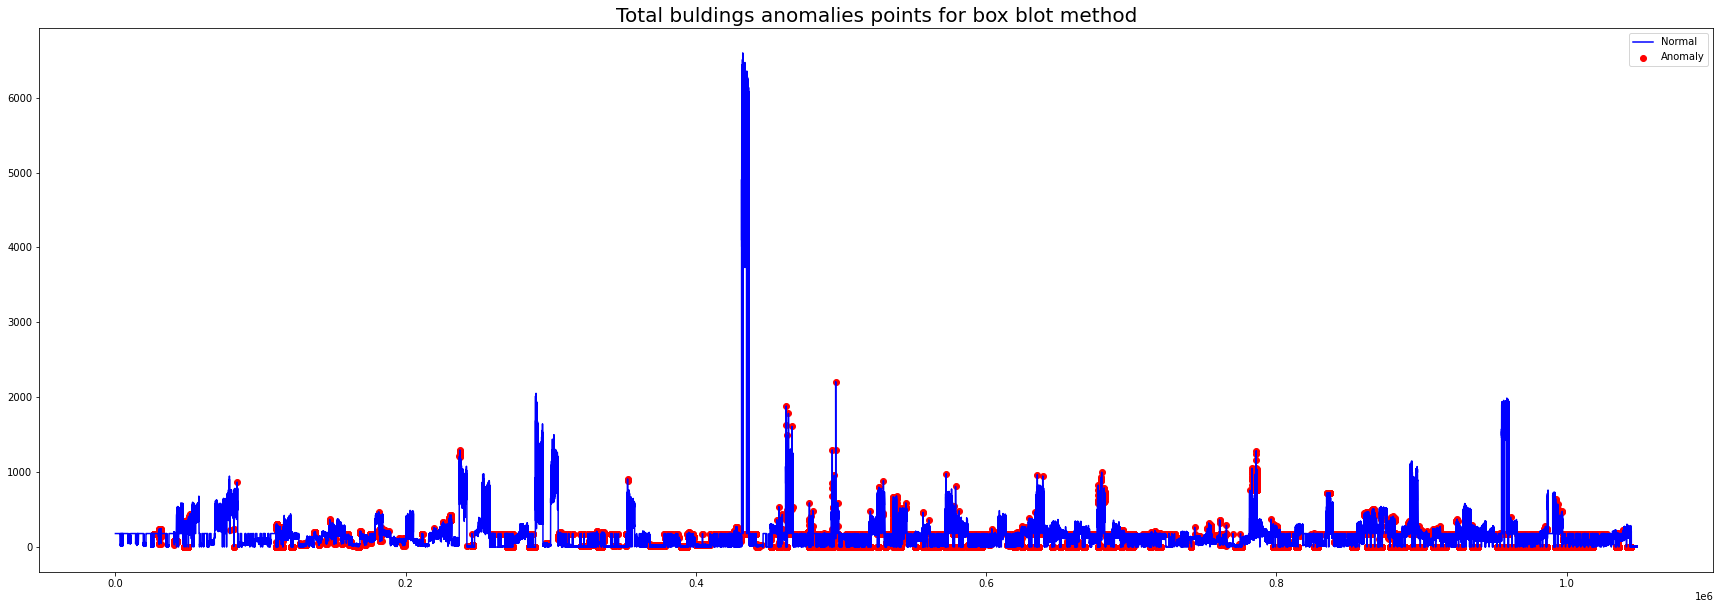

In [ ]:
fig, ax = plt.subplots(figsize=(30,10))

anomaly = anomalies.loc[anomalies['Anomaly'] == True, ['meter_reading']] 

ax.plot(anomalies.index, anomalies['meter_reading'], color='blue', label = 'Normal')
ax.scatter(anomaly.index,anomaly['meter_reading'], color='red', label = 'Anomaly')
ax.set_title('Total buldings anomalies points for box blot method', fontsize=20)
plt.legend()
plt.show();

In [ ]:
print("my first model predication has accurcy ",round((anomalies[anomalies['anomaly'] == anomalies['Anomaly']].shape[0]/anomalies.shape[0])*100,2),"%")

my first model predication has accurcy  95.33 %


In [ ]:
from sklearn.decomposition import PCA
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest

In [ ]:
random_building_id = df.groupby("building_id").get_group(108)
random_building_id.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5266 entries, 01-01-2016 00:00 to 07-08-2016 09:00
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   building_id    5266 non-null   int64  
 1   meter_reading  5266 non-null   float64
 2   anomaly        5266 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 164.6+ KB


In [ ]:
# train isolation forest
outliers_fraction = float(.01)
scaler = StandardScaler()
np_scaled = scaler.fit_transform(random_building_id["meter_reading"].values.reshape(-1, 1))
df_data = pd.DataFrame(np_scaled)

model =  IsolationForest(contamination=outliers_fraction)
model.fit(df_data)

IsolationForest(contamination=0.01)

In [ ]:
# predict isolation forest
Anomaly = model.predict(df_data)

In [ ]:
Anomaly = pd.DataFrame(Anomaly,columns=['Anomaly'])
Anomaly

,Anomaly
0,1
1,1
2,1
3,1
4,1
...,...
5261,1
5262,1
5263,1
5264,1


In [ ]:
random_building_id = pd.concat([random_building_id.reset_index(), Anomaly], axis=1)
random_building_id

,timestamp,building_id,meter_reading,anomaly,Anomaly
0,01-01-2016 00:00,108,180.777984,0,1
1,01-01-2016 01:00,108,182.531000,1,1
2,01-01-2016 02:00,108,1.000000,1,1
3,01-01-2016 03:00,108,1.000000,1,1
4,01-01-2016 04:00,108,1.000000,1,1
...,...,...,...,...,...
5261,07-08-2016 05:00,108,180.777984,0,1
5262,07-08-2016 06:00,108,180.777984,0,1
5263,07-08-2016 07:00,108,180.777984,0,1
5264,07-08-2016 08:00,108,180.777984,0,1


In [ ]:
random_building_id['Anomaly'].value_counts()

1    5266
Name: Anomaly, dtype: int64

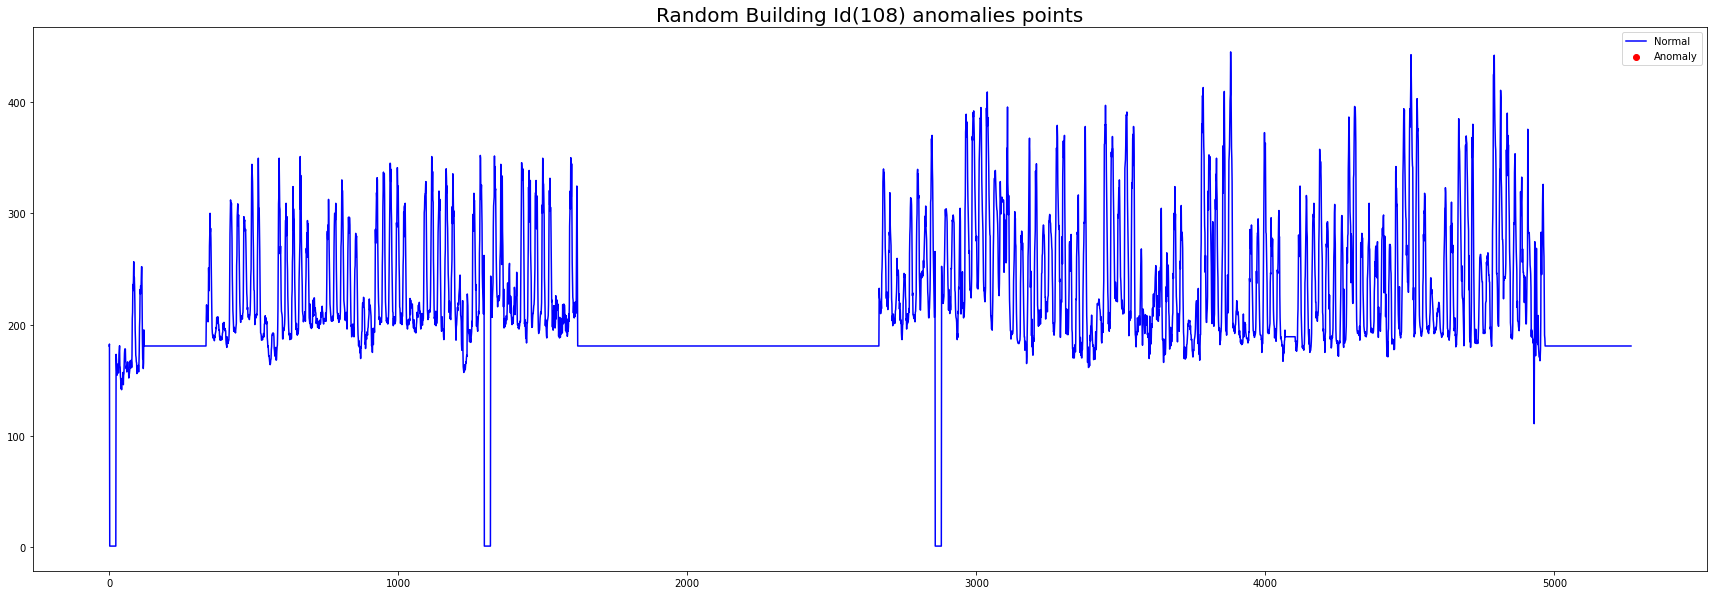

In [ ]:
fig, ax = plt.subplots(figsize=(30,10))

anomaly = random_building_id.loc[random_building_id['Anomaly'] == -1, ['meter_reading']] 

ax.plot(random_building_id.index, random_building_id['meter_reading'], color='blue', label = 'Normal')
ax.scatter(anomaly.index,anomaly['meter_reading'], color='red', label = 'Anomaly')
ax.set_title('Random Building Id(108) anomalies points', fontsize=20)
plt.legend()
plt.show();

In [ ]:
random_building_id['Anomaly'].value_counts()

1    5266
Name: Anomaly, dtype: int64

In [ ]:
random_building_id['Anomaly'] = random_building_id['Anomaly'].replace(1, 0)
random_building_id['Anomaly'] = random_building_id['Anomaly'].replace(-1, 1)

In [ ]:
print("my first model predication for only one building has accurcy ",round((random_building_id[random_building_id['anomaly'] == random_building_id['Anomaly']].shape[0]/random_building_id.shape[0])*100,2),"%")

my first model predication for only one building has accurcy  97.82 %


In [ ]:
data=[]
for building in buildings:
    All_buildings = df.groupby("building_id").get_group(building)
    data.append(All_buildings)

In [ ]:
data[0]

In [ ]:
# train isolation forest
full_anomaly = pd.DataFrame()
for i in range (x):
    
    All_buildings = data[i]
    
    outliers_fraction = float(.01)

    scaler = StandardScaler()
    np_scaled = scaler.fit_transform(All_buildings["meter_reading"].values.reshape(-1, 1))
    df_data = pd.DataFrame(np_scaled)

    model =  IsolationForest(contamination=outliers_fraction)
    model.fit(df_data) 
    Anomaly = model.predict(df_data)
    Anomaly = pd.DataFrame(Anomaly,columns=['Anomaly'])
    print("========== building number {} predicted ==========".format(i+1))
    full_anomaly = full_anomaly.append(Anomaly)

In [ ]:
full_anomaly.reset_index(inplace= True)
full_anomaly.drop('index', axis=1, inplace=True)
full_anomaly

,Anomaly
0,1
1,1
2,1
3,1
4,1
...,...
1048570,1
1048571,1
1048572,1
1048573,1


In [ ]:
df_full_anomaly = pd.concat([df.reset_index(), full_anomaly], axis=1)
df_full_anomaly

,timestamp,building_id,meter_reading,anomaly,Anomaly
0,01-01-2016 00:00,1,180.777984,0,1
1,01-01-2016 00:00,32,180.777984,0,1
2,01-01-2016 00:00,41,180.777984,0,1
3,01-01-2016 00:00,55,180.777984,0,1
4,01-01-2016 00:00,69,180.777984,0,1
...,...,...,...,...,...
1048570,07-08-2016 09:00,657,15.300000,0,1
1048571,07-08-2016 09:00,658,11.200000,0,1
1048572,07-08-2016 09:00,666,2.900000,0,1
1048573,07-08-2016 09:00,667,1.700000,0,1


In [ ]:
fig, ax = plt.subplots(figsize=(30,10))

anomaly = df_full_anomaly.loc[df_full_anomaly['Anomaly'] == -1, ['meter_reading']] 

ax.plot(df_full_anomaly.index, df_full_anomaly['meter_reading'], color='blue', label = 'Normal')
ax.scatter(anomaly.index,anomaly['meter_reading'], color='red', label = 'Anomaly')
ax.set_title('All buildings anomalies points', fontsize=20)
plt.legend()
plt.show();

In [ ]:
df_full_anomaly['Anomaly'].value_counts()

In [ ]:
df_full_anomaly['Anomaly'] = df_full_anomaly['Anomaly'].replace(1, 0)
df_full_anomaly['Anomaly'] = df_full_anomaly['Anomaly'].replace(-1, 1)

In [ ]:
print("my first model predication for only one building has accurcy ",round((df_full_anomaly[df_full_anomaly['anomaly'] == df_full_anomaly['Anomaly']].shape[0]/df.shape[0])*100,2),"%")

In [ ]:
# Load libraries

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/AnomalyDetection_Dataset/train_features.csv')
test = pd.read_csv('/content/drive/MyDrive/AnomalyDetection_Dataset/test_features.csv')

In [ ]:
train.head()

,building_id,timestamp,meter_reading,anomaly,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,...,gte_meter,gte_meter_hour,gte_meter_weekday,gte_meter_month,gte_meter_building_id,gte_meter_primary_use,gte_meter_site_id,gte_meter_building_id_hour,gte_meter_building_id_weekday,gte_meter_building_id_month
0,1,01-01-2016 00:00,NaN,0,0,Education,2720,104,0,19.4,...,4.116,3.981,4.146,4.12,3.569,4.489,4.079,3.554,3.538,3.845
1,32,01-01-2016 00:00,NaN,0,0,Office,48392,105,0,19.4,...,4.116,3.981,4.146,4.12,4.513,4.211,4.079,4.128,4.579,4.317
2,41,01-01-2016 00:00,NaN,0,0,Office,93860,68,0,19.4,...,4.116,3.981,4.146,4.12,4.108,4.211,4.079,4.103,4.140,4.114
3,55,01-01-2016 00:00,NaN,0,0,Office,16726,111,0,19.4,...,4.116,3.981,4.146,4.12,3.506,4.211,4.079,3.308,3.565,3.813
4,69,01-01-2016 00:00,NaN,0,0,Parking,387638,100,0,19.4,...,4.116,3.981,4.146,4.12,3.035,3.623,4.079,3.892,3.090,3.577


In [ ]:
train.tail()

,building_id,timestamp,meter_reading,anomaly,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,...,gte_meter,gte_meter_hour,gte_meter_weekday,gte_meter_month,gte_meter_building_id,gte_meter_primary_use,gte_meter_site_id,gte_meter_building_id_hour,gte_meter_building_id_weekday,gte_meter_building_id_month
1048570,657,07-08-2016 09:00,15.3,0,5,Education,109071,66,3,18.0,...,4.116,4.187,3.989,4.186,3.806,4.489,2.67,4.226,3.462,3.120
1048571,658,07-08-2016 09:00,11.2,0,5,Entertainment/public assembly,31075,76,2,18.0,...,4.116,4.187,3.989,4.186,2.432,3.532,2.67,2.712,2.216,2.379
1048572,666,07-08-2016 09:00,2.9,0,5,Entertainment/public assembly,12045,76,1,18.0,...,4.116,4.187,3.989,4.186,1.651,3.532,2.67,1.991,1.244,1.487
1048573,667,07-08-2016 09:00,1.7,0,5,Entertainment/public assembly,15715,66,2,18.0,...,4.116,4.187,3.989,4.186,1.410,3.532,2.67,1.576,1.043,1.041
1048574,673,07-08-2016 09:00,5.1,0,5,Entertainment/public assembly,36307,76,2,18.0,...,4.116,4.187,3.989,4.186,2.407,3.532,2.67,1.692,2.309,2.788


In [ ]:
train.shape

(1048575, 57)

In [ ]:
train.columns

Index(['building_id', 'timestamp', 'meter_reading', 'anomaly', 'site_id',
       'primary_use', 'square_feet', 'year_built', 'floor_count',
       'air_temperature', 'cloud_coverage', 'dew_temperature',
       'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction',
       'wind_speed', 'air_temperature_mean_lag7', 'air_temperature_max_lag7',
       'air_temperature_min_lag7', 'air_temperature_std_lag7',
       'air_temperature_mean_lag73', 'air_temperature_max_lag73',
       'air_temperature_min_lag73', 'air_temperature_std_lag73', 'hour',
       'weekday', 'month', 'year', 'weekday_hour', 'hour_x', 'hour_y',
       'month_x', 'month_y', 'weekday_x', 'weekday_y', 'building_weekday_hour',
       'building_weekday', 'building_month', 'building_hour', 'building_meter',
       'is_holiday', 'gte_hour', 'gte_weekday', 'gte_month', 'gte_building_id',
       'gte_primary_use', 'gte_site_id', 'gte_meter', 'gte_meter_hour',
       'gte_meter_weekday', 'gte_meter_month', 'gte_meter_building

In [ ]:
train.duplicated().sum()

0

In [ ]:
train.isnull().sum()

building_id                          0
timestamp                            0
meter_reading                    77102
anomaly                              0
site_id                              0
primary_use                          0
square_feet                          0
year_built                           0
floor_count                          0
air_temperature                      0
cloud_coverage                       0
dew_temperature                      0
precip_depth_1_hr                    0
sea_level_pressure                   0
wind_direction                       0
wind_speed                           0
air_temperature_mean_lag7            0
air_temperature_max_lag7             0
air_temperature_min_lag7             0
air_temperature_std_lag7             0
air_temperature_mean_lag73           0
air_temperature_max_lag73            0
air_temperature_min_lag73            0
air_temperature_std_lag73            0
hour                                 0
weekday                  

In [ ]:
train = train[['building_id', 'meter_reading', 'square_feet',
       'year_built', 'floor_count','air_temperature', 'dew_temperature',
       'precip_depth_1_hr', 'sea_level_pressure','is_holiday','anomaly']]

test = test[['building_id',  'meter_reading','square_feet',
       'year_built', 'floor_count','air_temperature', 'dew_temperature',
       'precip_depth_1_hr', 'sea_level_pressure','is_holiday']]

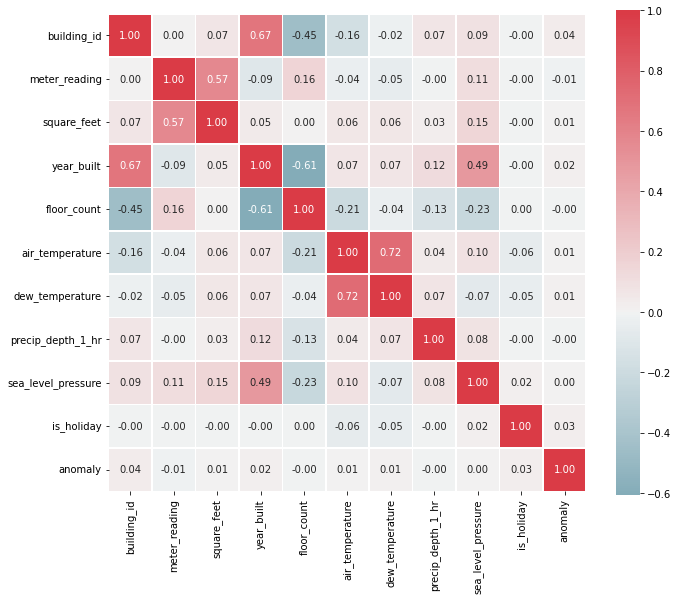

In [ ]:
def HeatMap(df,x=True):
        correlations = df.corr()
        ## Create color map ranging between two colors
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
        fig, ax = plt.subplots(figsize=(10, 10))
        fig = sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',square=True, linewidths=.5, annot=x, cbar_kws={"shrink": .75})
        fig.set_xticklabels(fig.get_xticklabels(), rotation = 90, fontsize = 10)
        fig.set_yticklabels(fig.get_yticklabels(), rotation = 0, fontsize = 10)
        plt.tight_layout()
        plt.show()

HeatMap(train,x=True)

In [ ]:
missing_val_count_by_column = (train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

meter_reading    77102
dtype: int64


In [ ]:
from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer()
df_clean = my_imputer.fit_transform(train.iloc[:,1:2])
df_name =train.iloc[:,1:2].columns
df_clean = pd.DataFrame(df_clean,columns = df_name)

missing_val_count_by_column = (df_clean.isnull().sum())
print(missing_val_count_by_column)

meter_reading    0
dtype: int64


In [ ]:
train["meter_reading"] = df_clean["meter_reading"]

In [ ]:
missing_val_count_by_column = (test.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

meter_reading    74815
dtype: int64


In [ ]:
from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer()
df_clean = my_imputer.fit_transform(test.iloc[:,1:2])
df_name =test.iloc[:,1:2].columns
df_clean = pd.DataFrame(df_clean,columns = df_name)

missing_val_count_by_column = (df_clean.isnull().sum())
print(missing_val_count_by_column)

meter_reading    0
dtype: int64


In [ ]:
test["meter_reading"] = df_clean["meter_reading"]

In [ ]:
y = train[['anomaly']]
X = train.drop(['anomaly'], axis = 1)

X_train, X_test, y_train, y_test =train_test_split(X,y,
                                                   test_size=0.25,
                                                   random_state=0,
                                                   stratify=y)

In [ ]:
X_train.shape

(786431, 10)

In [ ]:
X_train.columns

Index(['building_id', 'meter_reading', 'square_feet', 'year_built',
       'floor_count', 'air_temperature', 'dew_temperature',
       'precip_depth_1_hr', 'sea_level_pressure', 'is_holiday'],
      dtype='object')

In [ ]:
y_train.shape

(786431, 1)

In [ ]:
y_train.columns

Index(['anomaly'], dtype='object')

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
LR= LogisticRegression(random_state=42)  
LR.fit(X_train, y_train)  

LogisticRegression(random_state=42)

In [ ]:
y_pred = LR.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

0.9774551391601562

In [ ]:
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[256234,      0],
       [  5910,      0]])

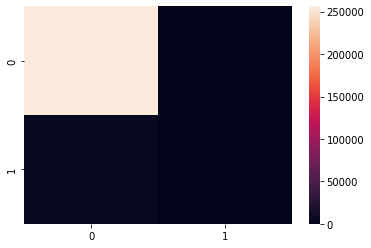

In [ ]:
sns.heatmap(cm)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    256234
           1       0.00      0.00      0.00      5910

    accuracy                           0.98    262144
   macro avg       0.49      0.50      0.49    262144
weighted avg       0.96      0.98      0.97    262144



In [ ]:
DT = DecisionTreeClassifier(criterion='entropy', random_state=42)  

In [ ]:
DT.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
y_pred_dt = DT.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_dt)

0.9930458068847656

In [ ]:
cm_dt = confusion_matrix(y_test, y_pred_dt)

In [ ]:
cm_dt

array([[255290,    944],
       [   879,   5031]])

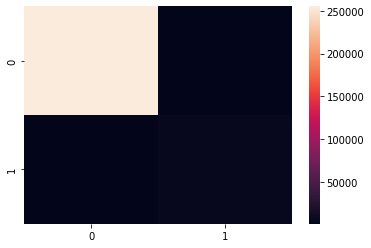

In [ ]:
sns.heatmap(cm_dt)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256234
           1       0.84      0.85      0.85      5910

    accuracy                           0.99    262144
   macro avg       0.92      0.92      0.92    262144
weighted avg       0.99      0.99      0.99    262144



In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.Sequential([keras.layers.Input(shape=(10,)),
                          keras.layers.Dense(256, activation='relu'),
                          keras.layers.BatchNormalization(),
                          keras.layers.Dense(256, activation='relu'),
                          keras.layers.BatchNormalization(),
                          keras.layers.Dense(64, activation='relu'),
                          keras.layers.BatchNormalization(),
                          keras.layers.Dense(1, activation='sigmoid')])

model.compile(
    optimizer = 'adam',
    loss='binary_crossentropy',
    metrics = ['AUC']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2816      
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 batch_normalization_2 (Batc  (None, 64)               2

In [ ]:
history = model.fit(X_train, y_train,
                    verbose = 1,
                    batch_size = 128,
                    epochs = 10,
                    validation_data = (X_test, y_test))

Epoch 1/10
6144/6144 [==============================] - 45s 7ms/step - loss: 0.0800 - auc: 0.8345 - val_loss: 0.0871 - val_auc: 0.8499
Epoch 2/10
6144/6144 [==============================] - 41s 7ms/step - loss: 0.0615 - auc: 0.8812 - val_loss: 0.0585 - val_auc: 0.8975
Epoch 3/10
6144/6144 [==============================] - 40s 7ms/step - loss: 0.0581 - auc: 0.8968 - val_loss: 0.0596 - val_auc: 0.8966
Epoch 4/10
6144/6144 [==============================] - 41s 7ms/step - loss: 0.0557 - auc: 0.9064 - val_loss: 0.0531 - val_auc: 0.9161
Epoch 5/10
6144/6144 [==============================] - 40s 6ms/step - loss: 0.0546 - auc: 0.9113 - val_loss: 0.0503 - val_auc: 0.9257
Epoch 6/10
6144/6144 [==============================] - 41s 7ms/step - loss: 0.0530 - auc: 0.9185 - val_loss: 0.0501 - val_auc: 0.9254
Epoch 7/10
6144/6144 [==============================] - 42s 7ms/step - loss: 0.0514 - auc: 0.9231 - val_loss: 0.0486 - val_auc: 0.9331
Epoch 8/10
6144/6144 [==============================] -

In [ ]:
predictions = model.predict(X_test)

8192/8192 [==============================] - 14s 2ms/step


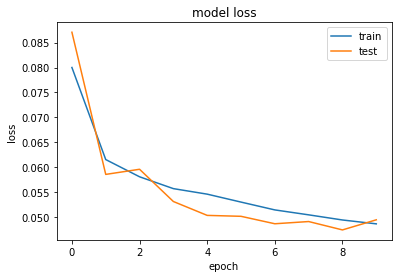

In [ ]:
# summarize history for loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc

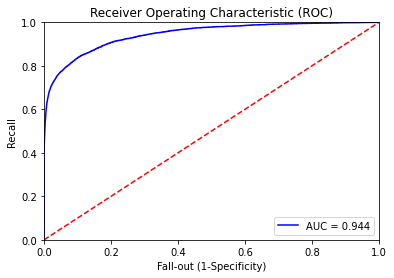

In [ ]:
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(false_positive_rate, recall)
plt.figure()
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X,y,
                                                   test_size=0.25,
                                                   random_state=0,
                                                   stratify=y)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
LR_new= LogisticRegression(random_state=42)  
LR_new.fit(X_train, y_train) 

LogisticRegression(random_state=42)

In [ ]:
y_pred_lr = LR_new.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_lr)

0.5591139349188632